# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Koandres
- Email: koandresphbti@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda selama dua tahun?
- Bagaimana perbandingan antara peminjaman sepeda antara hari kerja (working days) dan hari libur (holidays)?
- Bagaimana perbandingan antara peminjaman sepeda berdasarkan musim selama dua tahun?
- Bagaimana perbandingan antara peminjaman sepeda berdasarkan kondisi cuaca selama dua tahun?

## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Data Wrangling

### Gathering Data

Mengunduh dan mengekstrak dataset yang akan digunakan

In [2]:
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 87.1MB/s]


In [3]:
local_zip = '/content/Bike-sharing-dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

Memuat tabel hour dan day yang berisi:
  1. instant: record index
  2. dteday : date
  3. season : season (1:springer, 2:summer, 3:fall, 4:winter)
  4. yr : year (0: 2011, 1:2012)
  5. mnth : month ( 1 to 12)
  6. hr : hour (0 to 23)
  7. holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
  8. weekday : day of the week
  9. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
  10. weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  11. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
  12. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
  13. hum: Normalized humidity. The values are divided to 100 (max)
  14. windspeed: Normalized wind speed. The values are divided to 67 (max)
  15. casual: count of casual users
  16. registered: count of registered users
  17. cnt: count of total rental bikes including both casual and registered

Perbedaanya adalah pada tabel day tidak memiliki kolom hr



In [4]:
hour_df = pd.read_csv("/content/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day_df = pd.read_csv("/content/data/day.csv")
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
122,123,2011-05-03,2,0,5,0,2,1,2,0.616667,0.582079,0.697083,0.342667,603,3848,4451
327,328,2011-11-24,4,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560,935,1495
562,563,2012-07-16,3,1,7,0,1,1,1,0.763333,0.724125,0.645000,0.164187,1088,5742,6830
638,639,2012-09-30,4,1,9,0,0,0,1,0.526667,0.517663,0.583333,0.134958,2015,4874,6889
610,611,2012-09-02,3,1,9,0,0,0,2,0.696667,0.649000,0.815000,0.064071,2613,3197,5810
360,361,2011-12-27,1,0,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450,103,1059,1162
228,229,2011-08-17,3,0,8,0,3,1,1,0.723333,0.666671,0.575417,0.143667,668,4026,4694
371,372,2012-01-07,1,1,1,0,6,0,1,0.393333,0.390779,0.531667,0.174758,1070,3451,4521
476,477,2012-04-21,2,1,4,0,6,0,1,0.570000,0.542921,0.682917,0.283587,2541,4083,6624
493,494,2012-05-08,2,1,5,0,2,1,2,0.581667,0.557471,0.685833,0.296029,738,4990,5728


### Assessing Data

Mengecek Kesesuaian Tipe Data

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengecek nilai missing value

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengecek data duplikat

In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Mengecek apakah data memiliki keanehan atau tidak

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Mengulangi langkah yang sama untuk tabel day

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Mengubah tipe data yang tidak sesuai

In [14]:
hour_df.dteday = pd.to_datetime(hour_df.dteday)
day_df.dteday = pd.to_datetime(day_df.dteday)

## Exploratory Data Analysis (EDA)

### Explore Day_df

Dikarenakan day dan hour memiliki data yang sama dengan perbedaan hour merupakan penjabaran dari day untuk tiap jamnya, sehingga saya memutuskan hanya untuk menggunakan data day saja.

Mengubah isi kolom season, weathersit, dan workingday supaya lebih mudah dalam visualisasi data

In [15]:
hari = {0: 'libur', 1: 'kerja'}

# Gunakan map() untuk mengganti nilai kolom 'musim' dengan nama musim
day_df['workingday'] = day_df['workingday'].replace(hari)

# Tampilkan hasil perubahan
print(day_df['workingday'].unique())
day_df.sample(10)

['libur' 'kerja']


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
444,445,2012-03-20,1,1,3,0,2,kerja,1,0.560833,0.538533,0.807917,0.121271,1051,5042,6093
600,601,2012-08-23,3,1,8,0,4,kerja,1,0.695833,0.637008,0.635833,0.084596,1363,6402,7765
534,535,2012-06-18,2,1,6,0,1,kerja,2,0.568333,0.544842,0.777917,0.174746,653,4446,5099
295,296,2011-10-23,4,0,10,0,0,libur,1,0.421667,0.422333,0.741250,0.099513,1619,2762,4381
277,278,2011-10-05,4,0,10,0,3,kerja,1,0.538333,0.527138,0.647917,0.177250,559,4267,4826
80,81,2011-03-22,2,0,3,0,2,kerja,1,0.441667,0.440642,0.624583,0.225750,460,2243,2703
25,26,2011-01-26,1,0,1,0,3,kerja,3,0.217500,0.203600,0.862500,0.293850,34,472,506
433,434,2012-03-09,1,1,3,0,5,kerja,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569
12,13,2011-01-13,1,0,1,0,4,kerja,1,0.165000,0.150883,0.470417,0.301000,38,1368,1406
415,416,2012-02-20,1,1,2,1,1,libur,1,0.280000,0.273391,0.507826,0.229083,502,2627,3129


In [16]:
musim_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Gunakan map() untuk mengganti nilai kolom 'musim' dengan nama musim
day_df['season'] = day_df['season'].replace(musim_dict)

# Tampilkan hasil perubahan
print(day_df['season'].unique())
day_df.sample(10)

['spring' 'summer' 'fall' 'winter']


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
172,173,2011-06-22,fall,0,6,0,3,kerja,1,0.733333,0.693829,0.707500,0.172262,661,3846,4507
696,697,2012-11-27,winter,1,11,0,2,kerja,2,0.291667,0.281558,0.786667,0.237562,123,3836,3959
100,101,2011-04-11,summer,0,4,0,1,kerja,2,0.595652,0.565217,0.716956,0.324474,855,2493,3348
387,388,2012-01-23,spring,1,1,0,1,kerja,2,0.218333,0.243058,0.911250,0.110708,145,2287,2432
354,355,2011-12-21,spring,0,12,0,3,kerja,2,0.428333,0.428017,0.858333,0.221400,107,2553,2660
300,301,2011-10-28,winter,0,10,0,5,kerja,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747
181,182,2011-07-01,fall,0,7,0,5,kerja,1,0.722500,0.652162,0.396250,0.102608,1246,4116,5362
310,311,2011-11-07,winter,0,11,0,1,kerja,1,0.395000,0.400871,0.758750,0.057225,373,3662,4035
295,296,2011-10-23,winter,0,10,0,0,libur,1,0.421667,0.422333,0.741250,0.099513,1619,2762,4381
662,663,2012-10-24,winter,1,10,0,3,kerja,1,0.587500,0.558721,0.636250,0.072779,795,6898,7693


In [17]:
cuaca = {1: 'cerah', 2: 'berawan', 3: 'mendung', 4: 'ekstrem'}

# Gunakan map() untuk mengganti nilai kolom 'musim' dengan nama musim
day_df['weathersit'] = day_df['weathersit'].replace(cuaca)

# Tampilkan hasil perubahan
print(day_df['weathersit'].unique())
day_df.sample(10)

['berawan' 'cerah' 'mendung']


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
248,249,2011-09-06,fall,0,9,0,2,kerja,mendung,0.540000,0.515200,0.886957,0.343943,204,2506,2710
694,695,2012-11-25,winter,1,11,0,0,libur,cerah,0.245833,0.257583,0.468333,0.150500,309,2115,2424
440,441,2012-03-16,spring,1,3,0,5,kerja,berawan,0.435833,0.436229,0.842083,0.113192,548,3830,4378
693,694,2012-11-24,winter,1,11,0,6,libur,cerah,0.278333,0.248742,0.404583,0.376871,532,1745,2277
388,389,2012-01-24,spring,1,1,0,2,kerja,cerah,0.342500,0.349108,0.835833,0.123767,439,3900,4339
469,470,2012-04-14,summer,1,4,0,6,libur,cerah,0.495000,0.487996,0.502917,0.190917,2795,4665,7460
236,237,2011-08-25,fall,0,8,0,4,kerja,berawan,0.684167,0.645854,0.771667,0.210833,435,3107,3542
393,394,2012-01-29,spring,1,1,0,0,libur,cerah,0.282500,0.272721,0.311250,0.240050,558,2685,3243
406,407,2012-02-11,spring,1,2,0,6,libur,mendung,0.224167,0.210867,0.731250,0.289796,192,1977,2169
687,688,2012-11-18,winter,1,11,0,0,libur,cerah,0.342500,0.337746,0.692917,0.227612,922,3747,4669


## Visualization & Explanatory Analysis

### Pertanyaan 1:

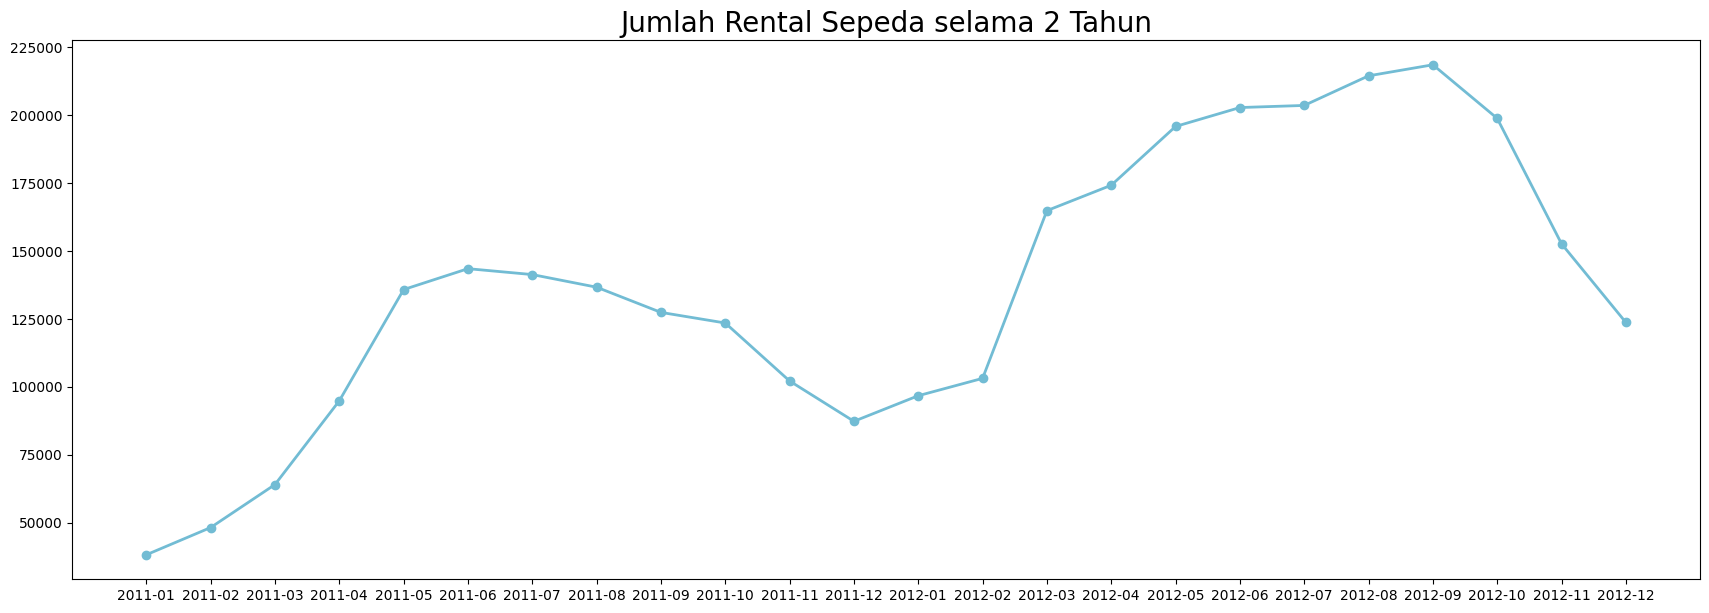

In [18]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_df.index = monthly_df.index.strftime('%Y-%m')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "cnt": "Total Rental"
}, inplace=True)

plt.figure(figsize=(21, 7))
plt.plot(monthly_df["dteday"], monthly_df["Total Rental"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Rental Sepeda selama 2 Tahun", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:

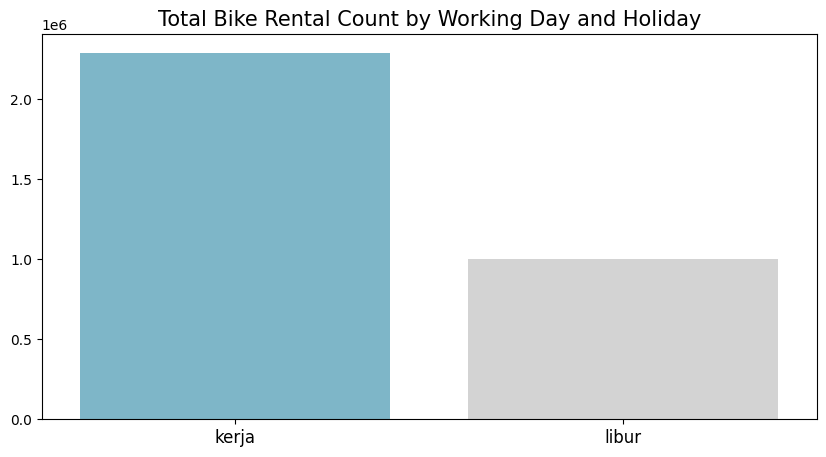

In [19]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
byworkday_df = day_df.groupby(by="workingday").cnt.sum().reset_index()
byworkday_df.rename(columns={
    "cnt": "Total Rental"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="Total Rental",
    x="workingday",
    data=byworkday_df.sort_values(by="Total Rental", ascending=False),
    palette=colors
)
plt.title("Total Bike Rental Count by Working Day and Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3:

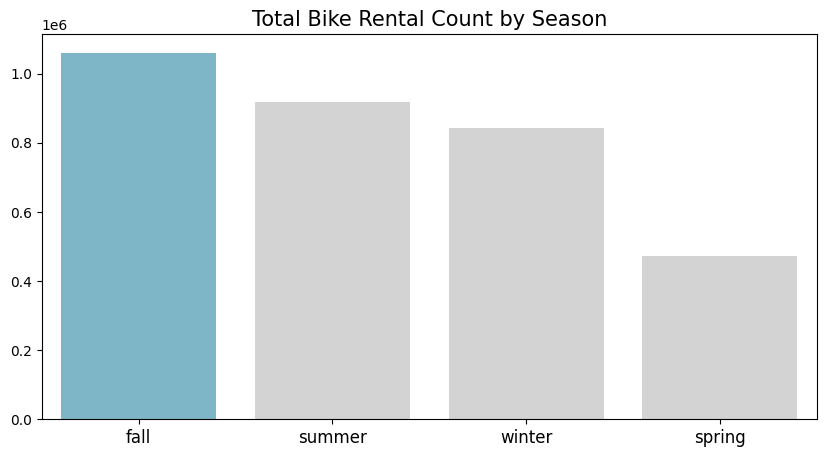

In [20]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
byseason_df = day_df.groupby(by="season").cnt.sum().reset_index()
byseason_df.rename(columns={
    "cnt": "Total Rental"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="Total Rental",
    x="season",
    data=byseason_df.sort_values(by="Total Rental", ascending=False),
    palette=colors
)
plt.title("Total Bike Rental Count by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 4:

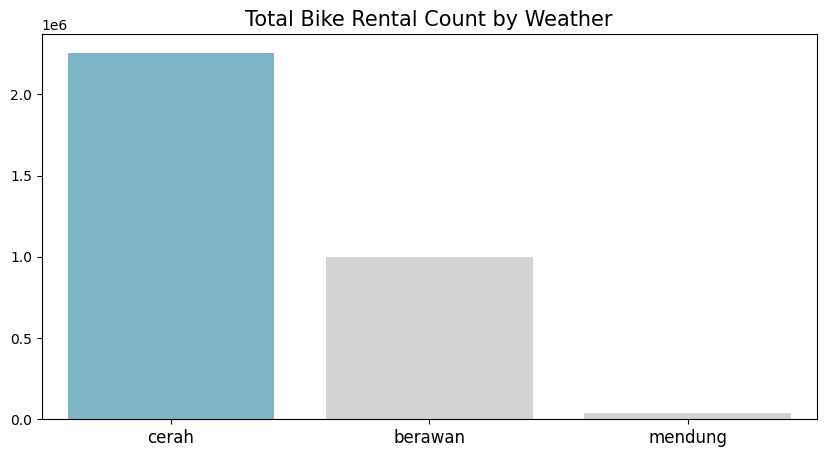

In [21]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
byweather_df = day_df.groupby(by="weathersit").cnt.sum().reset_index()
byweather_df.rename(columns={
    "cnt": "Total Rental"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="Total Rental",
    x="weathersit",
    data=byweather_df.sort_values(by="Total Rental", ascending=False),
    palette=colors
)
plt.title("Total Bike Rental Count by Weather", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

1. Secara keseluruhan total rental sepeda mengalami peningkatan, meskipun pada bulan 9 atau 10 di tahun 2011 dan 2012 mengalami penurunan signifikan, tetapi diakhir tahun 2012 total rental tetap lebih tinggi dibandingkan awal 2011
2. Lebih banyak terjadi peminjaman selama hari kerja
3. Total peminjaman tertinggi terjadi pada musim gugur (fall) dan terendah pada musim semi (spring)
4. Total peminjaman tertinggi terjadi ketika cuaca cerah dan terendah ketika terjadi cuaca ekstrem